# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


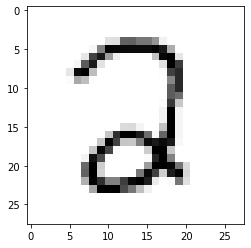

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2231
Training Accuracy: 0.7878, Testing Accuracy: 0.7974



Epoch 10, Loss 0.0578
Training Accuracy: 0.9410, Testing Accuracy: 0.9511



Epoch 20, Loss 0.0411
Training Accuracy: 0.9568, Testing Accuracy: 0.9567



Epoch 30, Loss 0.0345
Training Accuracy: 0.9624, Testing Accuracy: 0.9622



Epoch 40, Loss 0.0309
Training Accuracy: 0.9656, Testing Accuracy: 0.9657



Epoch 50, Loss 0.0284
Training Accuracy: 0.9681, Testing Accuracy: 0.9667



Epoch 60, Loss 0.0266
Training Accuracy: 0.9693, Testing Accuracy: 0.9682



Epoch 70, Loss 0.0253
Training Accuracy: 0.9715, Testing Accuracy: 0.9703



Epoch 80, Loss 0.0241
Training Accuracy: 0.9728, Testing Accuracy: 0.9713



Epoch 90, Loss 0.0232
Training Accuracy: 0.9745, Testing Accuracy: 0.9718



Epoch 100, Loss 0.0224
Training Accuracy: 0.9760, Testing Accuracy: 0.9718



Epoch 110, Loss 0.0216
Training Accuracy: 0.9769, Testing Accuracy: 0.9723



Epoch 120, Loss 0.021
Training Accuracy: 0.9776, Testing Accuracy: 0.9723



Epoch 130, Loss 0.0204
Training Accuracy: 0.9777, Testing Accuracy: 0.9723



Epoch 140, Loss 0.0198
Training Accuracy: 0.9782, Testing Accuracy: 0.9728



Epoch 150, Loss 0.0193
Training Accuracy: 0.9789, Testing Accuracy: 0.9738



Epoch 160, Loss 0.0188
Training Accuracy: 0.9794, Testing Accuracy: 0.9738



Epoch 170, Loss 0.0183
Training Accuracy: 0.9797, Testing Accuracy: 0.9743



Epoch 180, Loss 0.0179
Training Accuracy: 0.9801, Testing Accuracy: 0.9743



Epoch 190, Loss 0.0175
Training Accuracy: 0.9806, Testing Accuracy: 0.9743



Epoch 200, Loss 0.017
Training Accuracy: 0.9812, Testing Accuracy: 0.9743



Epoch 210, Loss 0.0167
Training Accuracy: 0.9816, Testing Accuracy: 0.9748



Epoch 220, Loss 0.0163
Training Accuracy: 0.9822, Testing Accuracy: 0.9748



Epoch 230, Loss 0.0159
Training Accuracy: 0.9828, Testing Accuracy: 0.9763



Epoch 240, Loss 0.0156
Training Accuracy: 0.9835, Testing Accuracy: 0.9773



0.0008237243158649333

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2302
Training Accuracy: 0.7248, Testing Accuracy: 0.7278



Epoch 10, Loss 0.1021
Training Accuracy: 0.9147, Testing Accuracy: 0.9234



Epoch 20, Loss 0.0791
Training Accuracy: 0.9297, Testing Accuracy: 0.9395



Epoch 30, Loss 0.0684
Training Accuracy: 0.9364, Testing Accuracy: 0.9471



Epoch 40, Loss 0.0619
Training Accuracy: 0.9411, Testing Accuracy: 0.9536



Epoch 50, Loss 0.0574
Training Accuracy: 0.9454, Testing Accuracy: 0.9577



Epoch 60, Loss 0.0541
Training Accuracy: 0.9473, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0516
Training Accuracy: 0.9488, Testing Accuracy: 0.9597



Epoch 80, Loss 0.0495
Training Accuracy: 0.9499, Testing Accuracy: 0.9607



Epoch 90, Loss 0.0478
Training Accuracy: 0.9508, Testing Accuracy: 0.9602



Epoch 100, Loss 0.0464
Training Accuracy: 0.9524, Testing Accuracy: 0.9617



Epoch 110, Loss 0.0451
Training Accuracy: 0.9537, Testing Accuracy: 0.9622



Epoch 120, Loss 0.0441
Training Accuracy: 0.9542, Testing Accuracy: 0.9627



Epoch 130, Loss 0.0431
Training Accuracy: 0.9550, Testing Accuracy: 0.9632



Epoch 140, Loss 0.0423
Training Accuracy: 0.9554, Testing Accuracy: 0.9637



Epoch 150, Loss 0.0415
Training Accuracy: 0.9557, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0408
Training Accuracy: 0.9564, Testing Accuracy: 0.9642



Epoch 170, Loss 0.0402
Training Accuracy: 0.9568, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0396
Training Accuracy: 0.9574, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0391
Training Accuracy: 0.9579, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0386
Training Accuracy: 0.9587, Testing Accuracy: 0.9672



Epoch 210, Loss 0.0382
Training Accuracy: 0.9592, Testing Accuracy: 0.9672



Epoch 220, Loss 0.0378
Training Accuracy: 0.9596, Testing Accuracy: 0.9672



Epoch 230, Loss 0.0374
Training Accuracy: 0.9600, Testing Accuracy: 0.9672



Epoch 240, Loss 0.037
Training Accuracy: 0.9603, Testing Accuracy: 0.9672



0.02530902661972612

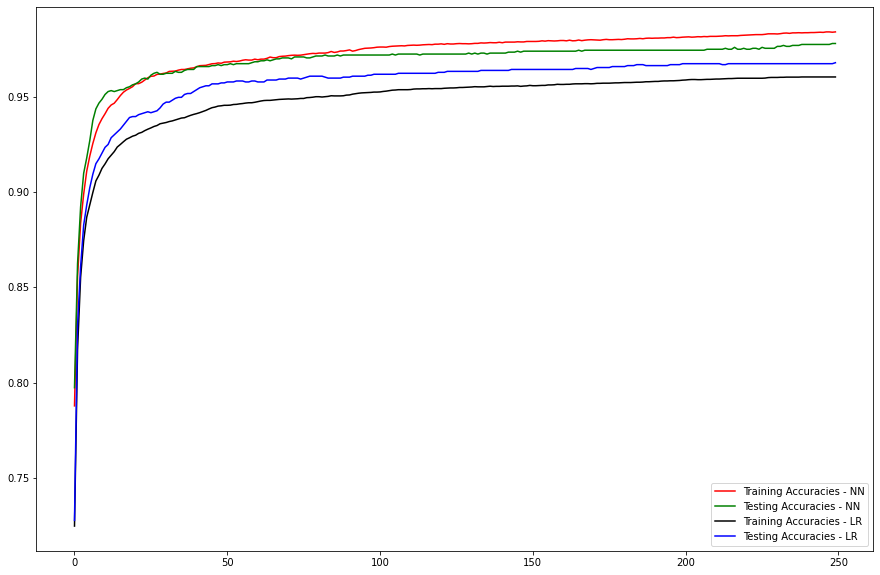

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

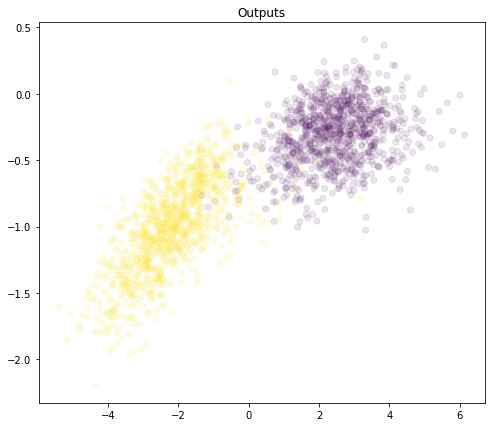

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

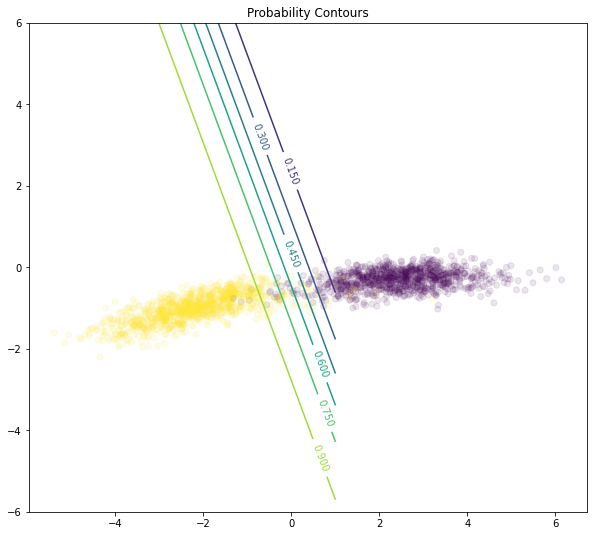

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );